<a href="https://colab.research.google.com/github/josearroyoportillo/LifeExpectancy-Corruption/blob/main/panel_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 | Import General Data to be Combined

In [ ]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# packages needed in the future
!pip install linearmodels
!pip install statsmodels

##1.1 | import life expectancy data

In [ ]:
# life_exp_path = "/content/drive/MyDrive/Colab Notebooks/University/Forecasting/data/life_exp_worldbank.xlsx" - only for personal google drive files
life_exp_df = pd.read_excel('life_exp_worldbank.xlsx')
life_exp_df.head()

,country,code,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,75.299,75.441,75.583,75.725,75.868,76.010,76.152
1,Afghanistan,AFG,62.054,62.525,62.966,63.377,63.763,64.130,64.486
2,Angola,AGO,57.236,58.054,58.776,59.398,59.925,60.379,60.782
3,Albania,ALB,77.252,77.554,77.813,78.025,78.194,78.333,78.458
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##1.2 | import corruption data

In [ ]:
# corrupt_path = '/content/drive/MyDrive/Colab Notebooks/University/Forecasting/data/new_corruption/merged_cpi_data.csv' - only for personal google drive files
corrupt_df = pd.read_csv('merged_cpi_data.csv')
corrupt_df.rename(columns={'Country':'country',
                           'Year':'year',
                           'ISO3':'code',
                           'CPI Score':'corruption_perception'}, inplace=True)
corrupt_df.drop(['country','Rank', 'Number of Sources',
                  'Minimum score', 'Maximum score', 'Standard Error',
                  '90% Confidence Interval (Higher bound)',
                  '90% Confidence Interval (Lower bound)', 'ADB', 
                  'AfDB', 'BF_SGI', 'BF_TI', 'EIU', 'FH', 'GI', 'IMD', 'PERC', 
                  'PRS', 'TI', 'VDP', 'WB',
                  'WEF', 'WJP', 'Region', 'WB Code',
                  'OECD', 'G20', 'BRICS', 'EU', 'Arab states', 
                  'IFS Code'], axis=1, inplace=True)


corrupt_df

,year,corruption_perception,code
0,2010,93.0,DNK
1,2010,93.0,NZL
2,2010,93.0,SGP
3,2010,92.0,FIN
4,2010,92.0,SWE
...,...,...,...
1767,2019,16.0,VEN
1768,2019,15.0,YEM
1769,2019,13.0,SYR
1770,2019,12.0,SSD


##1.3 | import meat consumption data

In [ ]:
# meat_path = "/content/drive/MyDrive/Colab Notebooks/University/Forecasting/data/meat.csv" - only for personal google drive files
pre_meat_df = pd.read_csv('meat.csv')

beef_df = pre_meat_df.drop(pre_meat_df[pre_meat_df['type'] != 'BEEF'].index)
beef_df = beef_df.drop(beef_df[beef_df['ratio'] != 'KG_CAP'].index)
poultry_df = pre_meat_df.drop(pre_meat_df[pre_meat_df['type'] != 'POULTRY'].index)
poultry_df = poultry_df.drop(poultry_df[poultry_df['ratio'] != 'KG_CAP'].index)
pork_df = pre_meat_df.drop(pre_meat_df[pre_meat_df['type'] != 'PIG'].index)
pork_df = pork_df.drop(pork_df[pork_df['ratio'] != 'KG_CAP'].index)
sheep_df = pre_meat_df.drop(pre_meat_df[pre_meat_df['type'] != 'SHEEP'].index)
sheep_df = sheep_df.drop(sheep_df[sheep_df['ratio'] != 'KG_CAP'].index)

# merging all subsection to one df
meat_df = pd.merge(poultry_df, beef_df, on=['code','year'], how='inner', copy=False)
meat_df = pd.merge(meat_df, pork_df, on=['code','year'], how='inner', copy=False)
meat_df = pd.merge(meat_df, sheep_df, on=['code','year'], how='inner', copy=False)
meat_df.drop(['type_x','ratio_x','type_y','ratio_y'], axis=1, inplace=True)
meat_df['kg_cap_meat'] = meat_df.iloc[:, 2:-1].sum(axis=1)
meat_df.drop(columns = meat_df.iloc[:, 2:5], inplace=True)


meat_df.head(-10)

,code,year,kg_cap_meat
0,AUS,1991,64.175028
1,AUS,1992,63.400956
2,AUS,1993,64.291148
3,AUS,1994,65.046131
4,AUS,1995,64.423441
...,...,...,...
1640,EU28,2012,63.849668
1641,EU28,2013,63.103524
1642,EU28,2014,64.717199
1643,EU28,2015,66.659801


## 1.4 | import country health statistics

In [ ]:
# health_stats_path = "/content/drive/MyDrive/Colab Notebooks/University/Forecasting/data/health_stats.csv" - only for personal google drive files
health_stats_df = pd.read_csv(health_stats.csv)
health_stats_df.rename(columns={'Country Code':'code',
                                'Country Name':'country',
                                'Indicator Name':'health_category'}, inplace=True)
health_stats_df.drop(columns='Indicator Code', inplace=True)
health_stats_df.drop(columns='Unnamed: 60', inplace=True)
health_stats_df.drop(columns='country',inplace=True)
health_stats_df.set_index('code')
health_stats_df.head(-10)

,code,health_category,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ARB,% of females ages 15-49 having comprehensive c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARB,% of males ages 15-49 having comprehensive cor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARB,"Adolescent fertility rate (births per 1,000 wo...",133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,132.675635,131.665502,129.19098,126.736756,124.382809,122.133431,120.020186,118.087531,116.132988,114.100918,111.980005,109.783822,106.033489,102.341721,98.739002,95.241251,91.791192,88.001177,84.207256,80.359323,76.441596,72.51458,71.170664,69.888768,69.004413,67.755992,66.928451,64.948968,62.922778,60.70707,58.596631,56.440128,55.53154,54.658781,53.83141,52.901528,51.990793,51.522856,51.10325,50.73259,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN
3,ARB,Adults (ages 15+) and children (0-14 years) li...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARB,Adults (ages 15+) and children (ages 0-14) new...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88995,ZWE,Tuberculosis treatment success rate (% of new ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000,53.00000,32.000000,69.000000,70.00000,73.000000,69.00000,71.000000,67.000000,66.000000,48.00000,66.00000,67.000000,78.000000,70.000000,75.000000,76.000000,80.000000,81.000000,80.000000,NaN,NaN
88996,ZWE,"Unemployment, female (% of female labor force)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,4.400000,4.600000,3.900000,4.20000,4.600000,4.900000,4.80000,4.500000,4.70000,5.800000,5.300000,4.800000,4.30000,4.30000,4.300000,4.300000,4.600000,4.900000,5.200000,6.000000,6.000000,5.600000,5.400000,NaN
88997,ZWE,"Unemployment, male (% of male labor force)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700000,6.800000,7.100000,6.000000,6.60000,7.200000,8.600000,8.00000,7.200000,7.60000,4.600000,4.400000,4.300000,4.10000,4.90000,5.800000,6.000000,6.900000,7.900000,5.700000,4.700000,4.700000,5.100000,5.300000,NaN
88998,ZWE,"Unemployment, total (% of total labor force)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.700000,5.700000,5.900000,5.000000,5.50000,6.000000,6.900000,6.50000,6.000000,6.30000,5.100000,4.800000,4.500000,4.20000,4.60000,5.100000,5.100000,5.700000,6.400000,5.500000,5.400000,5.300000,5.300000,5.400000,NaN


##1.5 | import country economics statistics

In [ ]:
# not used in final regression
# economic_stats_path = "/content/drive/MyDrive/Colab Notebooks/University/Forecasting/data/econ_stats.csv"
# economic_stats_df = pd.read_csv(economic_stats_path)
# economic_stats_df.head(-10)

##1.6 | import education data

In [ ]:
# not used in final regression
# ed_stats_path = "/content/drive/MyDrive/Colab Notebooks/University/Forecasting/data/archive/EdStatsData.csv" - only for personal google drive files
# ed_stats_df = pd.read_csv('EdStatsData.csv')
# ed_stats_df.head(-10)

#2 | Clean Up Dataframes and Combine for Panel Regression

##2.1 | organise life expectancy data

In [ ]:
life_df = life_exp_df.melt(id_vars=['country', 'code'], var_name='year', value_name='life_expectancy')
life_df.sort_values(by='country', ascending='False')
life_df.head(-10)

,country,code,year,life_expectancy
0,Aruba,ABW,2012,75.299000
1,Afghanistan,AFG,2012,62.054000
2,Angola,AGO,2012,57.236000
3,Albania,ALB,2012,77.252000
4,Andorra,AND,2012,NaN
...,...,...,...,...
1833,United States,USA,2018,78.539024
1834,Uzbekistan,UZB,2018,71.573000
1835,St. Vincent and the Grenadines,VCT,2018,72.415000
1836,"Venezuela, RB",VEN,2018,72.128000


## 2.2 | organise health data

In [ ]:
health_df = health_stats_df.pivot(index='code', columns='health_category', 
                                  values=['2011','2012','2013','2014','2015',
                                          '1960', '1961', '1962', '1963', '1964',
                                          '1965', '1966', '1967', '1968', '1969', 
                                          '1970', '1971', '1972', '1973',
                                          '1974', '1975', '1976', '1977', '1978',
                                          '1979', '1980', '1981', '1982',
                                          '1983', '1984', '1985', '1986', '1987',
                                          '1988', '1989', '1990', '1991',
                                          '1992', '1993', '1994', '1995', '1996',
                                          '1997', '1998', '1999', '2000',
                                          '2001', '2002', '2003', '2004', '2005',
                                          '2006', '2007', '2008', '2009',
                                          '2010',]).stack(0)
health_df = health_df.rename(columns={health_df.columns[1]:'year'})
health_df.reset_index(level=[0,1], inplace=True)
health_df.drop('year', axis=1, inplace=True)
health_df.rename(columns={'level_1':'year'}, inplace=True)
health_df.head(-10)

health_category,code,year,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),AIDS estimated deaths (UNAIDS estimates),ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female","Age at first marriage, male",Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated","Age population, age 02, male, interpolated","Age population, age 03, female, interpolated","Age population, age 03, male, interpolated","Age population, age 04, female, interpolated","Age population, age 04, male, interpolated","Age population, age 05, female, interpolated","Age population, age 05, male, interpolated","Age population, age 06, female, interpolated","Age population, age 06, male, interpolated","Age population, age 07, female, interpolated","Age population, age 07, male, interpolated","Age population, age 08, female, interpolated","Age population, age 08, male, interpolated","Age population, age 09, female, interpolated","Age population, age 09, male, interpolated","Age population, age 10, female, interpolated","Age population, age 10, male, interpolated","Age population, age 11, female, interpolated","Age population, age 11, male, interpolated","Age population, age 12, female, interpolated",...,Rural poverty headcount ratio at national poverty lines (% of rural population),"School enrollment, primary (% gross)","School enrollment, primary (% net)","School enrollment, primary, female (% gross)","School enrollment, primary, female (% net)","School enrollment, primary, male (% gross)","School enrollment, primary, male (% net)","School enrollment, secondary (% gross)","School enrollment, secondary (% net)","School enrollment, secondary, female (% gross)","School enrollment, secondary, female (% net)","School enrollment, secondary, male (% gross)","School enrollment, secondary, male (% net)","School enrollment, tertiary (% gross)","School enrollment, tertiary, female (% gross)",Sex ratio at birth (male births per female births),Share of women employed in the nonagricultural sector (% of total nonagricultural employment),"Smoking prevalence, females (% of adults)","Smoking prevalence, males (% of adults)","Specialist surgical workforce (per 100,000 population)","Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant),Tuberculosis case detection rate (all forms),"Tuberculosis death rate (per 100,000 people)",Tuberculosis treatment success rate (% of new cases),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)","Unemployment, total (% of total labor force)",Unmet need for contraception (% of married women ages 15-49),Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
0,ABW,1960,NaN,NaN,NaN,106.2062,NaN,NaN,NaN,NaN,NaN,NaN,86.333013,4.630139,81.702874,850.0,878.0,862.0,894.0,866.

##2.3 | merge the dataframes

In [ ]:
# preliminary organisation to make merging function perfectly
meat_df['year'] = meat_df['year'].astype(str)
health_df['year'] = health_df['year'].astype(str)
corrupt_df['year'] = corrupt_df['year'].astype(str)

# merging all the seperate dataframes and combining them all into amount of meat consumed
df = pd.merge(meat_df, health_df, on=['code','year'], how='inner', copy=False)
df = pd.merge(df, corrupt_df, on=['code','year'], how='inner', copy=False)

### Panel Regression Formatting ###
# drop some columns for panel regression and change names of variables
df.rename(columns = {'amount_x':'beef_kgcap'}, inplace=True)
df.rename(columns = {'amount_y':'poultry_kgcap'}, inplace=True)
df.rename(columns = {'amount':'pork_kgcap'}, inplace=True)



# remove unnecessary columns that are likely to cause bias via m.c.
# list of columns to remove by name
drop_col_secondary = ['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
            'Adults (ages 15+) living with HIV', 'Adults (ages 15+) newly infected with HIV','Unemployment, female (% of female labor force)',
            'Unemployment, male (% of male labor force)','Male population 00-04', 'Male population 05-09', 'Male population 10-14', 'Male population 15-19',
            'Male population 20-24', 'Male population 25-29', 'Male population 30-34', 'Male population 35-39', 'Male population 40-44', 'Male population 45-49',
            'Male population 50-54', 'Male population 55-59', 'Male population 60-64', 'Male population 65-69', 'Male population 70-74', 'Male population 75-79',
            'Male population 80+','Population ages 0-14, female', 'Population ages 0-14, male', 'Population ages 00-04, female (% of female population)',
            'Population ages 00-04, male (% of male population)', 'Population ages 00-14 (% of total)', 'Population ages 00-14, female (% of total)',
            'Population ages 00-14, male (% of total)', 'Population ages 00-14, total', 'Population ages 05-09, female (% of female population)', 
            'Population ages 05-09, male (% of male population)', 'Population ages 10-14, female (% of female population)',
            'Population ages 15-19, female (% of female population)', 'Population ages 15-19, male (% of male population)', 'Population ages 15-64 (% of total)',
            'Population ages 15-64, female', 'Population ages 15-64, female (% of total)', 'Population ages 15-64, male', 'Population ages 15-64, male (% of total)',
            'Population ages 15-64, total', 'Population ages 20-24, female (% of female population)', 'Population ages 20-24, male (% of male population)',
            'Population ages 25-29, female (% of female population)', 'Population ages 25-29, male (% of male population)', 
            'Population ages 30-34, female (% of female population)', 'Population ages 30-34, male (% of male population)',
            'Population ages 35-39, female (% of female population)', 'Population ages 35-39, male (% of male population)',
            'Population ages 40-44, female (% of female population)', 'Population ages 40-44, male (% of male population)',
            'Population ages 45-49, female (% of female population)', 'Population ages 45-49, male (% of male population)',
            'Population ages 50-54, female (% of female population)', 'Population ages 50-54, male (% of male population)',
            'Population ages 55-59, female (% of female population)', 'Population ages 55-59, male (% of male population)',
            'Population ages 60-64, female (% of female population)', 'Population ages 60-64, male (% of male population)',
            'Population ages 65 and above (% of total)', 'Population ages 65 and above, female', 'Population ages 65 and above, female (% of total)',
            'Population ages 65 and above, male', 'Population ages 65 and above, male (% of total)', 'Population ages 65 and above, total',
            'Population ages 65-69, female (% of female population)', 'Population ages 65-69, male (% of male population)',
            'Population ages 70-74, female (% of female population)', 'Population ages 70-74, male (% of male population)',
            'Population ages 75-79, female (% of female population)', 'Population ages 75-79, male (% of male population)',
            'Population ages 80 and older, female (% of female population)', 'Population ages 80 and older, male (% of male population)',
            'Population ages10-14, male (% of male population)','Prevalence of overweight, female (% of children under 5)',
            'Prevalence of overweight, female (% of female adults)', 'Prevalence of overweight, male (% of children under 5)',
            'Prevalence of overweight, male (% of male adults)', 'Prevalence of severe wasting, weight for height (% of children under 5)',
            'Prevalence of severe wasting, weight for height, female (% of children under 5)',
            'Prevalence of severe wasting, weight for height, male (% of children under 5)', 'Age dependency ratio, old',
            'Age dependency ratio, young', 'Age population, age 0, female, interpolated', 'Age population, age 0, male, interpolated', 
            'Age population, age 01, female, interpolated',
            'Age population, age 01, male, interpolated',
            'Age population, age 02, female, interpolated',
            'Age population, age 02, male, interpolated',
            'Age population, age 03, female, interpolated',
            'Age population, age 03, male, interpolated',
            'Age population, age 04, female, interpolated',
            'Age population, age 04, male, interpolated',
            'Age population, age 05, female, interpolated',
            'Age population, age 05, male, interpolated',
            'Age population, age 06, female, interpolated',
            'Age population, age 06, male, interpolated',
            'Age population, age 07, female, interpolated',
            'Age population, age 07, male, interpolated',
            'Age population, age 08, female, interpolated',
            'Age population, age 08, male, interpolated',
            'Age population, age 09, female, interpolated',
            'Age population, age 09, male, interpolated',
            'Age population, age 10, female, interpolated',
            'Age population, age 10, male, interpolated',
            'Age population, age 11, female, interpolated',
            'Age population, age 11, male, interpolated',
            'Age population, age 12, female, interpolated',
            'Age population, age 12, male, interpolated',
            'Age population, age 13, female, interpolated',
            'Age population, age 13, male, interpolated',
            'Age population, age 14, female, interpolated',
            'Age population, age 14, male, interpolated',
            'Age population, age 15, female, interpolated',
            'Age population, age 15, male, interpolated',
            'Age population, age 16, female, interpolated',
            'Age population, age 16, male, interpolated',
            'Age population, age 17, female, interpolated',
            'Age population, age 17, male, interpolated',
            'Age population, age 18, female, interpolated',
            'Age population, age 18, male, interpolated',
            'Age population, age 19, female, interpolated',
            'Age population, age 19, male, interpolated',
            'Age population, age 20, female, interpolated',
            'Age population, age 20, male, interpolated',
            'Age population, age 21, female, interpolated',
            'Age population, age 21, male, interpolated',
            'Age population, age 22, female, interpolated',
            'Age population, age 22, male, interpolated',
            'Age population, age 23, female, interpolated',
            'Age population, age 23, male, interpolated',
            'Age population, age 24, female, interpolated',
            'Age population, age 24, male, interpolated',
            'Age population, age 25, female, interpolated',
            'Age population, age 25, male, interpolated',
            'Children (ages 0-14) newly infected with HIV',
            'Children orphaned by HIV/AIDS',
            'Female population 00-04',
            'Female population 05-09',
            'Female population 10-14',
            'Female population 15-19',
            'Female population 20-24',
            'Female population 25-29',
            'Female population 30-34',
            'Female population 35-39',
            'Female population 40-44',
            'Female population 45-49',
            'Female population 50-54',
            'Female population 55-59',
            'Female population 60-64',
            'Female population 65-69',
            'Female population 70-74',
            'Female population 75-79',
            'Female population 80+','Age at first marriage, female',
            'Age at first marriage, male',
            'Age dependency ratio (% of working-age population)',
            'Antiretroviral therapy coverage (% of people living with HIV)',
            'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)',
            'Children (0-14) living with HIV',
            'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
            'Completeness of birth registration (%)',
            'Completeness of birth registration, rural (%)',
            'Completeness of birth registration, urban (%)',
            'Completeness of death registration with cause-of-death information (%)',
            'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)',
            'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
            'Condom use with non regular partner, % adults(15-49), female',
            'Mortality rate, under-5, female (per 1,000)',
            'Mortality rate, under-5, male (per 1,000)',
            'School enrollment, primary (% net)',
            'School enrollment, primary, female (% gross)',
            'School enrollment, primary, female (% net)',
            'School enrollment, primary, male (% gross)',
            'School enrollment, primary, male (% net)',
            'School enrollment, secondary (% net)',
            'School enrollment, secondary, female (% gross)',
            'School enrollment, secondary, female (% net)',
            'School enrollment, secondary, male (% gross)',
            'School enrollment, secondary, male (% net)',
            'School enrollment, tertiary, female (% gross)',
            'Prevalence of HIV, female (% ages 15-24)',
            'Prevalence of HIV, male (% ages 15-24)',
            'Population, female',
            'Population, female (% of total)',
            'Population, male',
            'Population, male (% of total)',
            'Health expenditure, private (% of GDP)',
            'Health expenditure, private (% of total health expenditure)',
            'Health expenditure, public (% of GDP)',
            'Health expenditure, public (% of government expenditure)',
            'Health expenditure, public (% of total health expenditure)',
            'Health expenditure, total (% of GDP)',
            'Health expenditure, total (current US$)',
            'People practicing open defecation (% of population)',
            'People practicing open defecation, rural (% of rural population)',
            'People practicing open defecation, urban (% of urban population)',
            'Hospital beds (per 1,000 people)',
            'Immunization, BCG (% of one-year-old children)',
            'Immunization, DPT (% of children ages 12-23 months)',
            'Immunization, HepB3 (% of one-year-old children)',
            'Immunization, Hib3 (% of children ages 12-23 months)',
            'Immunization, Pol3 (% of one-year-old children)',
            'Immunization, measles (% of children ages 12-23 months)',
            'Out-of-pocket health expenditure (% of private expenditure on health)',
            'Prevalence of anemia among children (% of children under 5)',
            'Prevalence of overweight (% of adults)',
            'Prevalence of overweight (% of children under 5)',
            'Prevalence of tuberculosis (per 100,000 population)',
            'Prevalence of undernourishment (% of population)',
            'Prevalence of wasting (% of children under 5)',
            'Tuberculosis case detection rate (all forms)',
            'Tuberculosis death rate (per 100,000 people)',
            'Tuberculosis treatment success rate (% of new cases)',
            'Consumption of iodized salt (% of households)',
            'Malnutrition prevalence, weight for age (% of children under 5)',
            'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
            'Infant and young child feeding practices, all 3 IYCF (% children ages 6-23 months)',
            'Labor force, total','Improved sanitation facilities, rural (% of rural population with access)',
            'Improved sanitation facilities, urban (% of urban population with access)',
            'Lifetime risk of maternal death (%)',
            'Lifetime risk of maternal death (1 in: rate varies by country)',
            'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
            'Risk of catastrophic expenditure for surgical care (% of people at risk)',
            'Risk of impoverishing expenditure for surgical care (% of people at risk)',
            'Rural population',
            'Rural population growth (annual %)',
            'Rural poverty headcount ratio at national poverty lines (% of rural population)',
            'Urban population',
            'Urban population (% of total)',
            'Urban population growth (annual %)',
            'Urban poverty headcount ratio at national poverty lines (% of urban population)',
            'Use of insecticide-treated bed nets (% of under-5 population)',
            'Vitamin A supplementation coverage rate (% of children ages 6-59 months)',
            'Wanted fertility rate (births per woman)',
            "Women's share of population ages 15+ living with HIV (%)",
            'Improved water source, rural (% of rural population with access)',
            'Improved water source, urban (% of urban population with access)',
            'School enrollment, primary (% gross)',
            'School enrollment, secondary (% gross)',
            'School enrollment, tertiary (% gross)',
            'Literacy rate, youth total (% of people ages 15-24)',
            'External resources for health (% of total expenditure on health)',
]
df.drop(columns=drop_col_secondary, axis=1, inplace=True)

drop_col_primary = ['Specialist surgical workforce (per 100,000 population)',
                    'Postnatal care coverage (% mothers)',
                    'Poverty headcount ratio at national poverty line (% of population)',
                    'Prevalence of HIV, total (% of population ages 15-49)',
                    'Primary completion rate, total (% of relevant age group)',
                    'Low-birthweight babies (% of births)',
                    'Malaria cases reported',
                    'Malnutrition prevalence, height for age (% of children under 5)',
                    'Maternal leave benefits (% of wages paid in covered period)',
                    'Maternal mortality ratio (national estimate, per 100,000 live births)',
                    'Mortality caused by road traffic injury (per 100,000 people)',
                    'Mortality rate, infant (per 1,000 live births)',
                    'Mortality rate, neonatal (per 1,000 live births)',
                    'Mortality rate, under-5 (per 1,000)',
                    'Net migration',
                    'Newborns protected against tetanus (%)',
                    'Number of infant deaths',
                    'Number of maternal deaths',
                    'Number of neonatal deaths',
                    'Number of people who are undernourished',
                    'Number of surgical procedures (per 100,000 population)',
                    'Number of under-five deaths',
                    'Number of weeks of maternity leave',
                    'Nurses and midwives (per 1,000 people)',
                    'Physicians (per 1,000 people)',
                    'Improved sanitation facilities (% of population with access)',
                    'Improved water source (% of population with access)',
                    'Incidence of HIV (% of uninfected population ages 15-49)',
                    'Incidence of tuberculosis (per 100,000 people)',
                    'AIDS estimated deaths (UNAIDS estimates)',
                    'ARI treatment (% of children under 5 taken to a health provider)',
                    'Adults (ages 15+) and children (0-14 years) living with HIV',
                    'Birth rate, crude (per 1,000 people)',
                    'Births attended by skilled health staff (% of total)',
                    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
                    'Cause of death, by injury (% of total)',
                    'Cause of death, by non-communicable diseases (% of total)',
                    'Community health workers (per 1,000 people)',
                    'Diabetes prevalence (% of population ages 20 to 79)',
                    'Diarrhea treatment (% of children under 5 receiving oral rehydration and continued feeding)',
                    'Diarrhea treatment (% of children under 5 who received ORS packet)',
                    'Exclusive breastfeeding (% of children under 6 months)',
                    'Fertility rate, total (births per woman)',
                    'Population growth (annual %)',
                    'GNI per capita, Atlas method (current US$)',
                    'Population, total',
                    'Health expenditure per capita, PPP'
                    ]
df.drop(columns=drop_col_primary, axis=1, inplace=True)
df = df[df.columns.drop(list(df.filter(regex='male')))]
df = df[df.columns.drop(list(df.filter(regex='female')))]
df = df[df.columns.drop(list(df.filter(regex='women')))]
df.fillna(0, inplace=True)
first_column = df.pop('Life expectancy at birth, total (years)')
df.insert(0, 'Life expectancy at birth, total (years)', first_column)
df['year'] = pd.to_datetime(df['year'], yearfirst=True)
df = df.set_index(['code','year'])
df.sort_index(inplace=True)
### End of Panel Regression Formatting ###



df

Life expectancy at birth, total (years)  ...  corruption_perception
code year                                                 ...                       
ARG  2010-01-01                                75.484976  ...               29.00000
     2011-01-01                                75.649049  ...               29.96074
     2012-01-01                                75.816244  ...               35.00000
     2013-01-01                                75.986098  ...               34.00000
     2014-01-01                                76.158610  ...               34.00000
...                                                  ...  ...                    ...
ZMB  2011-01-01                                57.422195  ...               31.95245
     2012-01-01                                58.363317  ...               37.00000
     2013-01-01                                59.237366  ...               38.00000
     2014-01-01                                60.047049  ...               38.00000
     2015-01-01                                 0.000000  ...               38.00000

[246 rows x 10 columns]

#3| Panel Regression

### Condition Tests for Homoskedasticity and Non-Autocorrelation

In [ ]:
# Pooled OLS
# Required imports
from linearmodels import PooledOLS
import statsmodels.api as sm
# variable for exogenous variables
exog_col = df.iloc[:, 1:]
# exog_col.astype(float)
# declare endog variable
exog = sm.tools.tools.add_constant(exog_col)
endog = df['Life expectancy at birth, total (years)']
# endog.astype(float)

# Run the regression
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids
exog

const  ...  corruption_perception
code year               ...                       
ARG  2010-01-01    1.0  ...               29.00000
     2011-01-01    1.0  ...               29.96074
     2012-01-01    1.0  ...               35.00000
     2013-01-01    1.0  ...               34.00000
     2014-01-01    1.0  ...               34.00000
...                ...  ...                    ...
ZMB  2011-01-01    1.0  ...               31.95245
     2012-01-01    1.0  ...               37.00000
     2013-01-01    1.0  ...               38.00000
     2014-01-01    1.0  ...               38.00000
     2015-01-01    1.0  ...               38.00000

[246 rows x 10 columns]

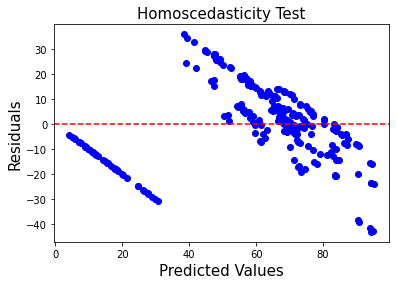

In [ ]:
# Check condition 3a and 3b
# 3a (homoskedasticity)
# 3a.1 Residuals Plot for Variance Detection
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoscedasticity Test', fontsize = 15)
plt.show()

In [ ]:
# 3a.2 White Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS], axis=1)
# white_test_results = het_white(pooled_OLS_dataset['residual'].fillna(0), exog)
# labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-value']
# print('White Test:') 
# print(dict(zip(labels, white_test_results)))

# white test is not used because breush pagan is enough
# 3a.3 Breusch-Pagan Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-statistic', 'F p-value'] 
print('\nBreusch-Pagan Test:')
print(dict(zip(labels, breusch_pagan_test_results)))
print('\n')
print('Note: if heteroskedasticity is indicated, there will be a violation of the assumption.')
print('Note: heteroskedasticity is indicated if p < .05.')


Breusch-Pagan Test:
{'LM-Stat': 41.33415097153552, 'LM p-val': 4.34788649708421e-06, 'F-statistic': 5.295819001008537, 'F p-value': 1.3850972955620192e-06}


Note: if heteroskedasticity is indicated, there will be a violation of the assumption.
Note: heteroskedasticity is indicated if p < .05.


In [ ]:
# 3b non-autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(residuals_pooled_OLS)
print('Durbin-Watson Test: ', durbin_watson_test_results)
print('Note: test will output a value between 0-4')
print('Note: a value of 2 indicates no autocorrelation, 0-2 means positive autocorrelation, 2-4 means negative autocorrelation.')

Durbin-Watson Test:  1.0119192079183383
Note: test will output a value between 0-4
Note: a value of 2 indicates no autocorrelation, 0-2 means positive autocorrelation, 2-4 means negative autocorrelation.


# Estimate Panel Regression



In [ ]:
# Panel OLS
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects

# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print('\n\n\n\n\n\n\n')
print(fe_res)

                                   RandomEffects Estimation Summary                                  
Dep. Variable:     Life expectancy at birth, total (years)   R-squared:                        0.6982
Estimator:                                   RandomEffects   R-squared (Between):             -2.0367
No. Observations:                                      246   R-squared (Within):               0.8628
Date:                                     Mon, Sep 06 2021   R-squared (Overall):              0.6982
Time:                                             07:27:31   Log-likelihood                   -1017.4
Cov. Estimator:                                 Unadjusted                                           
                                                             F-statistic:                      60.672
Entities:                                               41   P-value                           0.0000
Avg Obs:                                            6.0000   Distribution:        

In [ ]:
# Hausman test
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe,re):
  b = fe.params
  B = re.params
  v_b = fe.cov
  v_B = re.cov
  df_lite = b[np.abs(b) < 1e8].size
  chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b-B))
  pval = stats.chi2.sf(chi2,df_lite)
  return chi2, df_lite, pval

hausman_results = hausman(fe_res,re_res)
print('Hausman Test Results:')
print('   chi-squared: ' + str(hausman_results[0]))
print('   degrees of freedom: ' + str(hausman_results[1]))
print('   p-value: ' + str(hausman_results[2]))
print('\nNote: if p-value is very small, the null hypothesis can be rejected meaning we use fixed effects.')
print('If null hypo. is not rejected, we use random effects.')

Hausman Test Results:
   chi-squared: -157.1189005679689
   degrees of freedom: 10
   p-value: 1.0

Note: if p-value is very small, the null hypothesis can be rejected meaning we use fixed effects.
If null hypo. is not rejected, we use random effects.
